In [1]:
import pandas as pd
import numpy as np

In [2]:
#%%writefile "Automobile Price prediction 2.ipynb"
df = pd.read_csv(r'C:/Users/Ali/Downloads/Automobile.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Cleaning missing price values with mean() value.

In [6]:
df.price.replace('?',0, inplace=True)

In [7]:
df.price.replace(0,df.price.mean(), inplace=True)

In [8]:
df['price'] = pd.to_numeric(df['price'])

C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

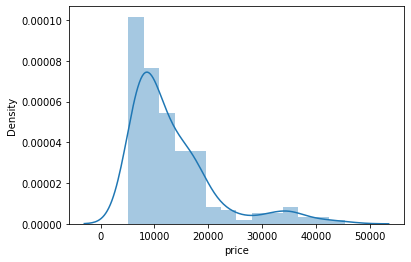

In [9]:
import seaborn as sns
sns.distplot(df.price)

### Cleaning Doors and Normalized loses

In [10]:
df[df['num-of-doors'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558.0
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.0


In [11]:
df['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [12]:
df.loc[(df['num-of-doors'] == '?') , 'num-of-doors' ] = 'four' 

In [13]:
df[df['num-of-doors'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [14]:
df['normalized-losses'].replace('?',0, inplace=True)

In [15]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
df['normalized-losses'].unique()

array([  0, 164, 158, 192, 188, 121,  98,  81, 118, 148, 110, 145, 137,
       101,  78, 106,  85, 107, 104, 113, 150, 129, 115,  93, 142, 161,
       153, 125, 128, 122, 103, 168, 108, 194, 231, 119, 154,  74, 186,
        83, 102,  89,  87,  77,  91, 134,  65, 197,  90,  94, 256,  95],
      dtype=int64)

In [16]:
pd.pivot_table(data=df , index='body-style', values='normalized-losses', aggfunc= np.mean )

,normalized-losses
body-style,
convertible,46.000000
hardtop,82.875000
hatchback,113.214286
sedan,100.583333
wagon,59.520000


In [17]:
df.loc[(df['body-style'] == 'hatchback') & (df['normalized-losses'] == 0), 'normalized-losses'] = 113
df.loc[(df['body-style'] == 'convertible') & (df['normalized-losses'] == 0), 'normalized-losses'] = 46
df.loc[(df['body-style'] == 'sedan') & (df['normalized-losses'] == 0), 'normalized-losses'] = 100
df.loc[(df['body-style'] == 'wagon') & (df['normalized-losses'] == 0), 'normalized-losses'] = 59
df.loc[(df['body-style'] == 'hardtop') & (df['normalized-losses'] == 0), 'normalized-losses'] = 82

### Cleaning Stroke and Bore

In [18]:
df[(df['bore'] == '?')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,10945.0
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,11845.0
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,13645.0
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,?,?,9.4,135,6000,16,23,15645.0


In [19]:
df['bore'].replace('?',0, inplace=True)
df['stroke'].replace('?',0, inplace=True)
df['stroke'] = pd.to_numeric(df['stroke'])
df['bore'] = pd.to_numeric(df['bore'])

In [20]:
df.loc[(df['bore'] == 0), 'bore' ] = 3.21

In [21]:
df.loc[(df['stroke'] == 0), 'stroke' ] = 3.27

### Cleaing peak-rpm and horsepower

In [22]:
df[df['peak-rpm'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,59,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295.0
131,2,113,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895.0


In [23]:
df[df['horsepower'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,59,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295.0
131,2,113,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895.0


In [24]:
df['peak-rpm'].replace('?', 0 , inplace=True)
df['horsepower'].replace('?', 0 , inplace=True)
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'])
df['horsepower'] = pd.to_numeric(df['horsepower'])

In [25]:
#pd.pivot_table(data=df, index=['body-style','make'], values='peak-rpm', aggfunc=np.mean)
pd.pivot_table(data=df , index=['body-style','drive-wheels'], values= ['horsepower', 'peak-rpm'], aggfunc=np.mean)

horsepower     peak-rpm
body-style  drive-wheels                         
convertible fwd            90.000000  5500.000000
            rwd           140.000000  5090.000000
hardtop     fwd            69.000000  5200.000000
            rwd           152.714286  5007.142857
hatchback   4wd           116.500000  4950.000000
            fwd            83.061224  5079.591837
            rwd           141.526316  5381.578947
sedan       4wd           102.666667  5033.333333
            fwd            86.631579  5154.385965
            rwd           129.222222  4970.833333
wagon       4wd            79.250000  4800.000000
            fwd            81.500000  4783.333333
            rwd           116.777778  4861.111111

In [26]:
df.loc[(df['body-style'] == 'wagon') & (df['horsepower'] == 0), 'horsepower'] = 81
df.loc[(df['body-style'] == 'hatchback') & (df['horsepower'] == 0), 'horsepower'] = 83
df.loc[(df['body-style'] == 'wagon') & (df['peak-rpm'] == 0), 'peak-rpm'] = 4783
df.loc[(df['body-style'] == 'hatchback') & (df['peak-rpm'] == 0), 'peak-rpm'] = 5079

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [28]:
### Cleaned Data
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,46,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,46,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,113,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


### Data for Machine Learning

In [29]:
import sklearn

In [30]:
df2 = df.loc[:,['make','aspiration','drive-wheels','engine-type','num-of-cylinders','fuel-system',
          'wheel-base','length','width','curb-weight','engine-size','horsepower','city-mpg','price']]
print(df.shape)
df2

(205, 26)


,make,aspiration,drive-wheels,engine-type,num-of-cylinders,fuel-system,wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg,price
0,alfa-romero,std,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,111,21,13495.0
1,alfa-romero,std,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,111,21,16500.0
2,alfa-romero,std,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,154,19,16500.0
3,audi,std,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,102,24,13950.0
4,audi,std,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,std,rwd,ohc,four,mpfi,109.1,188.8,68.9,2952,141,114,23,16845.0
201,volvo,turbo,rwd,ohc,four,mpfi,109.1,188.8,68.8,3049,141,160,19,19045.0
202,volvo,std,rwd,ohcv,six,mpfi,109.1,188.8,68.9,3012,173,134,18,21485.0
203,volvo,turbo,rwd,ohc,six,idi,109.1,188.8,68.9,3217,145,106,26,22470.0


In [31]:
#Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded = label_encoder.fit(df2['make'])
df2['make'] = encoded.transform(df['make'])


In [32]:
df2['aspiration'].replace(to_replace=['std','turbo'], value=[0,1], inplace=True)
df2

,make,aspiration,drive-wheels,engine-type,num-of-cylinders,fuel-system,wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg,price
0,0,0,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,111,21,13495.0
1,0,0,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,111,21,16500.0
2,0,0,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,154,19,16500.0
3,1,0,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,102,24,13950.0
4,1,0,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,0,rwd,ohc,four,mpfi,109.1,188.8,68.9,2952,141,114,23,16845.0
201,21,1,rwd,ohc,four,mpfi,109.1,188.8,68.8,3049,141,160,19,19045.0
202,21,0,rwd,ohcv,six,mpfi,109.1,188.8,68.9,3012,173,134,18,21485.0
203,21,1,rwd,ohc,six,idi,109.1,188.8,68.9,3217,145,106,26,22470.0


In [33]:
print(df2['drive-wheels'].unique())
df2['drive-wheels'].replace(to_replace=['rwd','fwd','4wd'], value=[0,1,2], inplace=True)
df2

['rwd' 'fwd' '4wd']


,make,aspiration,drive-wheels,engine-type,num-of-cylinders,fuel-system,wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg,price
0,0,0,0,dohc,four,mpfi,88.6,168.8,64.1,2548,130,111,21,13495.0
1,0,0,0,dohc,four,mpfi,88.6,168.8,64.1,2548,130,111,21,16500.0
2,0,0,0,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,154,19,16500.0
3,1,0,1,ohc,four,mpfi,99.8,176.6,66.2,2337,109,102,24,13950.0
4,1,0,2,ohc,five,mpfi,99.4,176.6,66.4,2824,136,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,0,0,ohc,four,mpfi,109.1,188.8,68.9,2952,141,114,23,16845.0
201,21,1,0,ohc,four,mpfi,109.1,188.8,68.8,3049,141,160,19,19045.0
202,21,0,0,ohcv,six,mpfi,109.1,188.8,68.9,3012,173,134,18,21485.0
203,21,1,0,ohc,six,idi,109.1,188.8,68.9,3217,145,106,26,22470.0


In [34]:
print(df2['engine-type'].unique())
df2['engine-type'].replace(to_replace=['dohc','ohcv','ohc','l','rotor','ohcf','dohcv'], value=[0,1,2,3,4,5,6], inplace=True)
df2

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


,make,aspiration,drive-wheels,engine-type,num-of-cylinders,fuel-system,wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg,price
0,0,0,0,0,four,mpfi,88.6,168.8,64.1,2548,130,111,21,13495.0
1,0,0,0,0,four,mpfi,88.6,168.8,64.1,2548,130,111,21,16500.0
2,0,0,0,1,six,mpfi,94.5,171.2,65.5,2823,152,154,19,16500.0
3,1,0,1,2,four,mpfi,99.8,176.6,66.2,2337,109,102,24,13950.0
4,1,0,2,2,five,mpfi,99.4,176.6,66.4,2824,136,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,0,0,2,four,mpfi,109.1,188.8,68.9,2952,141,114,23,16845.0
201,21,1,0,2,four,mpfi,109.1,188.8,68.8,3049,141,160,19,19045.0
202,21,0,0,1,six,mpfi,109.1,188.8,68.9,3012,173,134,18,21485.0
203,21,1,0,2,six,idi,109.1,188.8,68.9,3217,145,106,26,22470.0


In [35]:
print(df2['num-of-cylinders'].unique())
df2['num-of-cylinders'].replace(to_replace=['four','six','five','three','twelve','two','eight'], value=[0,1,2,3,4,5,6], inplace=True)
df2

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


,make,aspiration,drive-wheels,engine-type,num-of-cylinders,fuel-system,wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg,price
0,0,0,0,0,0,mpfi,88.6,168.8,64.1,2548,130,111,21,13495.0
1,0,0,0,0,0,mpfi,88.6,168.8,64.1,2548,130,111,21,16500.0
2,0,0,0,1,1,mpfi,94.5,171.2,65.5,2823,152,154,19,16500.0
3,1,0,1,2,0,mpfi,99.8,176.6,66.2,2337,109,102,24,13950.0
4,1,0,2,2,2,mpfi,99.4,176.6,66.4,2824,136,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,0,0,2,0,mpfi,109.1,188.8,68.9,2952,141,114,23,16845.0
201,21,1,0,2,0,mpfi,109.1,188.8,68.8,3049,141,160,19,19045.0
202,21,0,0,1,1,mpfi,109.1,188.8,68.9,3012,173,134,18,21485.0
203,21,1,0,2,1,idi,109.1,188.8,68.9,3217,145,106,26,22470.0


In [36]:
print(df2['fuel-system'].unique())
df2['fuel-system'].replace(to_replace=['mpfi','2bbl','mfi','1bbl','spfi','4bbl','idi','spdi'], value=[0,1,2,3,4,5,6,7], inplace=True)
df2

['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


,make,aspiration,drive-wheels,engine-type,num-of-cylinders,fuel-system,wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg,price
0,0,0,0,0,0,0,88.6,168.8,64.1,2548,130,111,21,13495.0
1,0,0,0,0,0,0,88.6,168.8,64.1,2548,130,111,21,16500.0
2,0,0,0,1,1,0,94.5,171.2,65.5,2823,152,154,19,16500.0
3,1,0,1,2,0,0,99.8,176.6,66.2,2337,109,102,24,13950.0
4,1,0,2,2,2,0,99.4,176.6,66.4,2824,136,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,0,0,2,0,0,109.1,188.8,68.9,2952,141,114,23,16845.0
201,21,1,0,2,0,0,109.1,188.8,68.8,3049,141,160,19,19045.0
202,21,0,0,1,1,0,109.1,188.8,68.9,3012,173,134,18,21485.0
203,21,1,0,2,1,6,109.1,188.8,68.9,3217,145,106,26,22470.0


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              205 non-null    int32  
 1   aspiration        205 non-null    int64  
 2   drive-wheels      205 non-null    int64  
 3   engine-type       205 non-null    int64  
 4   num-of-cylinders  205 non-null    int64  
 5   fuel-system       205 non-null    int64  
 6   wheel-base        205 non-null    float64
 7   length            205 non-null    float64
 8   width             205 non-null    float64
 9   curb-weight       205 non-null    int64  
 10  engine-size       205 non-null    int64  
 11  horsepower        205 non-null    int64  
 12  city-mpg          205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(4), int32(1), int64(9)
memory usage: 21.7 KB


In [38]:
df2.head()

,make,aspiration,drive-wheels,engine-type,num-of-cylinders,fuel-system,wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg,price
0,0,0,0,0,0,0,88.6,168.8,64.1,2548,130,111,21,13495.0
1,0,0,0,0,0,0,88.6,168.8,64.1,2548,130,111,21,16500.0
2,0,0,0,1,1,0,94.5,171.2,65.5,2823,152,154,19,16500.0
3,1,0,1,2,0,0,99.8,176.6,66.2,2337,109,102,24,13950.0
4,1,0,2,2,2,0,99.4,176.6,66.4,2824,136,115,18,17450.0


### Data is Showing us Homo-scadacity for some columns (>wheel-base)

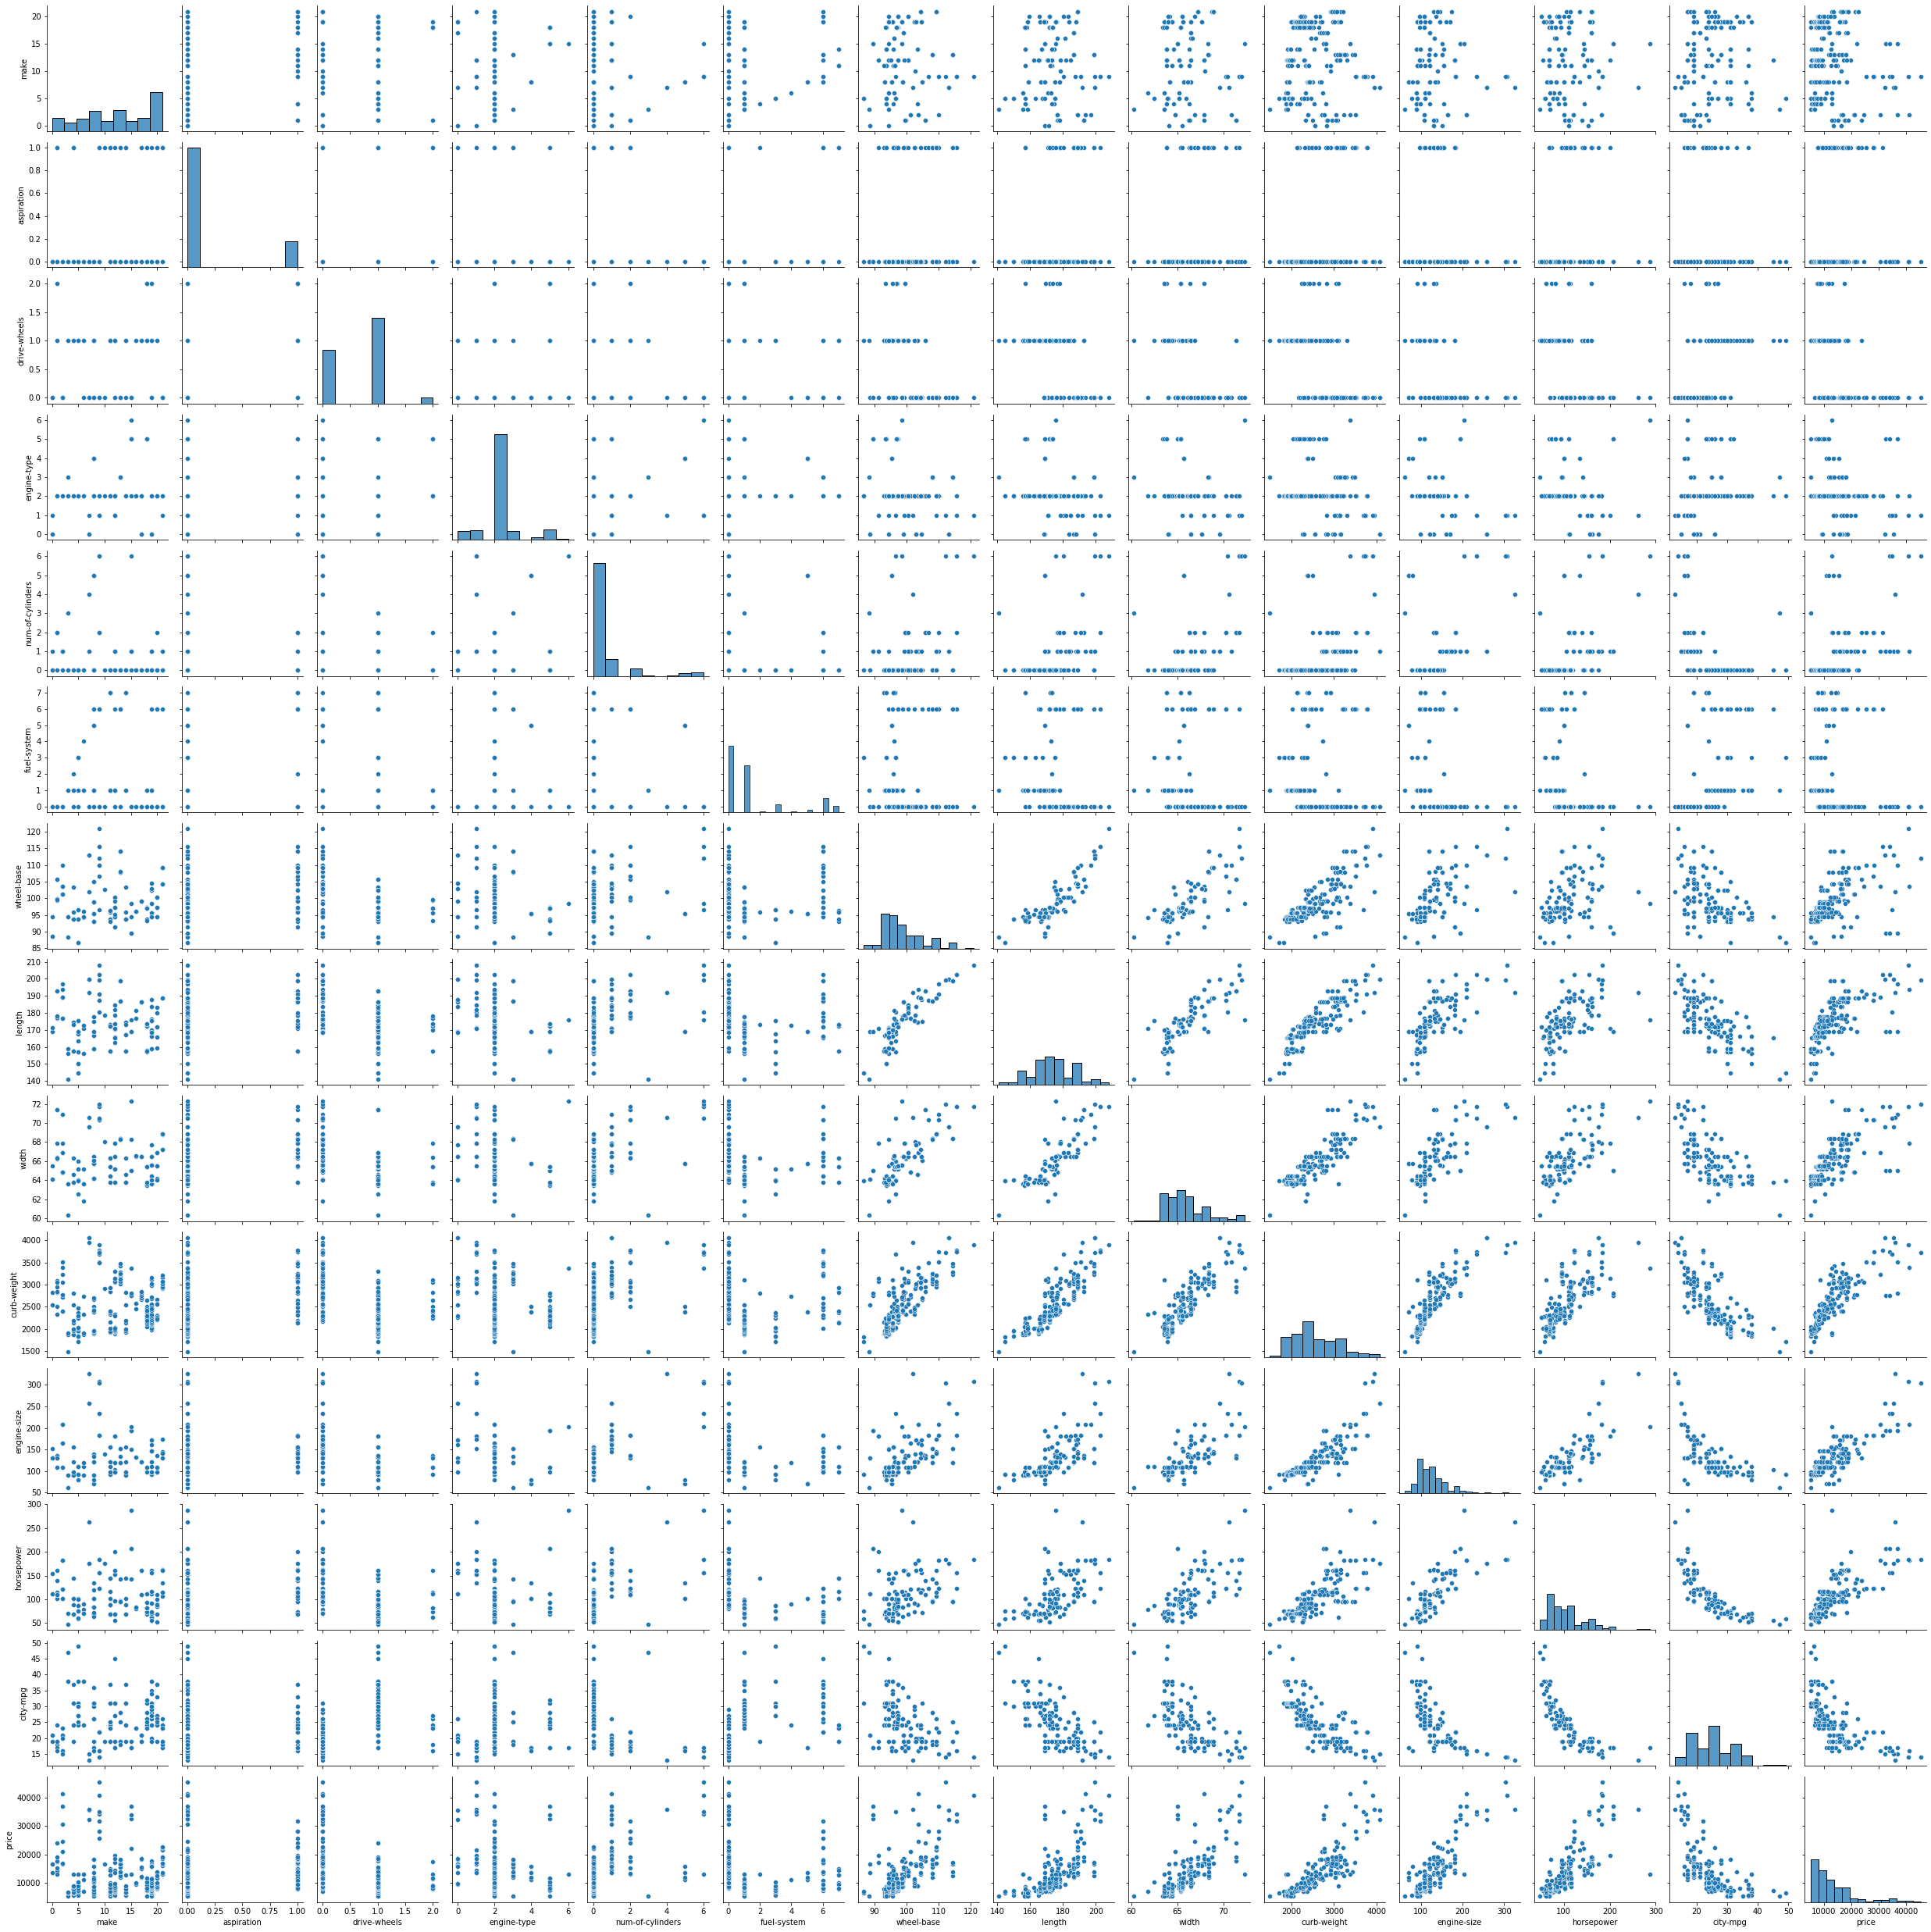

In [39]:
sns.pairplot(df2)

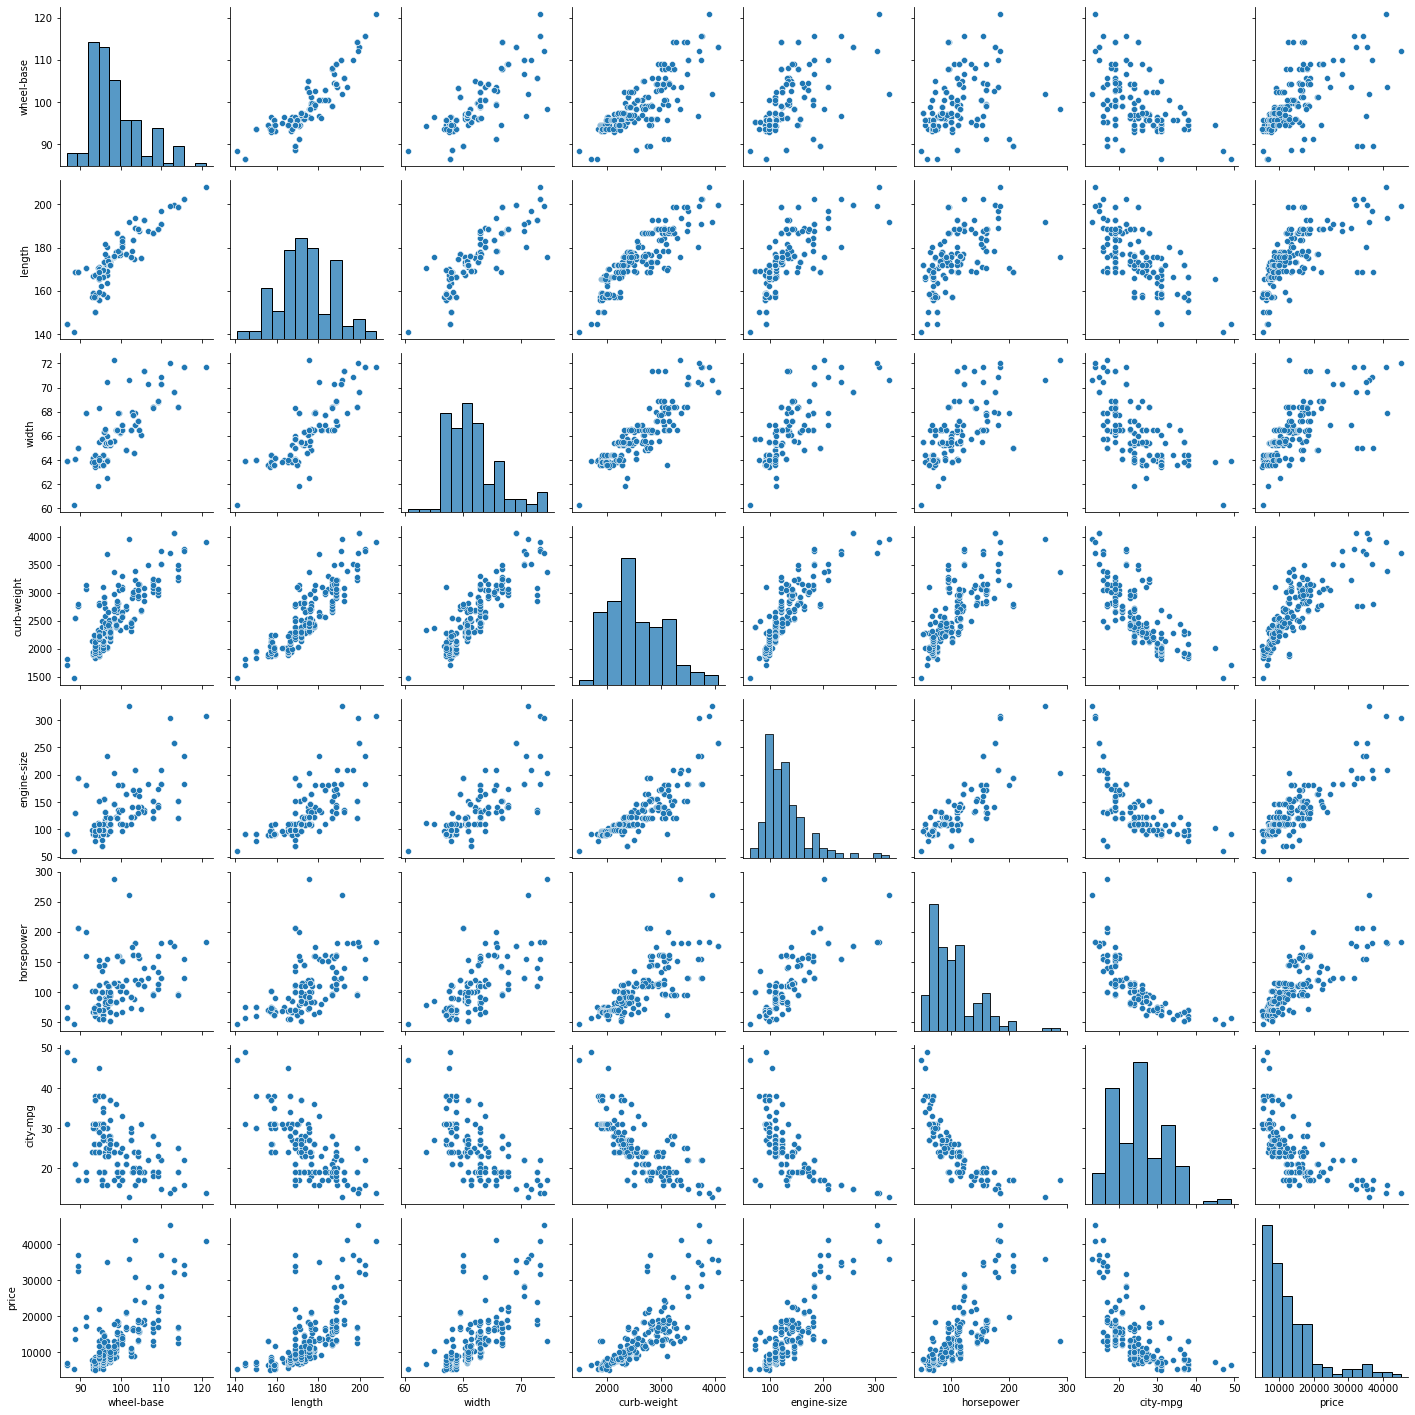

In [40]:
sns.pairplot(df2.iloc[:,6:])

In [41]:
pd.set_option('max_columns',100)
df2.head(2)

,make,aspiration,drive-wheels,engine-type,num-of-cylinders,fuel-system,wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg,price
0,0,0,0,0,0,0,88.6,168.8,64.1,2548,130,111,21,13495.0
1,0,0,0,0,0,0,88.6,168.8,64.1,2548,130,111,21,16500.0


In [42]:
### Checking Multicolinearity
import numpy as np
X = np.array(df2.iloc[:,6:-1])
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vifactor = pd.DataFrame()
vifactor = [vif(X, i) for i in range(X.shape[1])]
print(vifactor)
X = pd.DataFrame(X)
X

[1650.2760535389427, 1632.6607386307153, 1517.7746800637508, 250.46144724744917, 54.36510489004745, 46.8901762068905, 59.75057421319499]


,0,1,2,3,4,5,6
0,88.6,168.8,64.1,2548.0,130.0,111.0,21.0
1,88.6,168.8,64.1,2548.0,130.0,111.0,21.0
2,94.5,171.2,65.5,2823.0,152.0,154.0,19.0
3,99.8,176.6,66.2,2337.0,109.0,102.0,24.0
4,99.4,176.6,66.4,2824.0,136.0,115.0,18.0
...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952.0,141.0,114.0,23.0
201,109.1,188.8,68.8,3049.0,141.0,160.0,19.0
202,109.1,188.8,68.9,3012.0,173.0,134.0,18.0
203,109.1,188.8,68.9,3217.0,145.0,106.0,26.0


In [43]:
df2.iloc[:,6:-1]

,wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg
0,88.6,168.8,64.1,2548,130,111,21
1,88.6,168.8,64.1,2548,130,111,21
2,94.5,171.2,65.5,2823,152,154,19
3,99.8,176.6,66.2,2337,109,102,24
4,99.4,176.6,66.4,2824,136,115,18
...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,114,23
201,109.1,188.8,68.8,3049,141,160,19
202,109.1,188.8,68.9,3012,173,134,18
203,109.1,188.8,68.9,3217,145,106,26


In [44]:
for i in range(len(df2.columns[6:-1])):
    v=vif(np.matrix(df2.iloc[:,6:-1]),i)
    print("Variance inflation factor for {}: {}".format(df.columns[i],round(v,2)))

Variance inflation factor for symboling: 1650.28
Variance inflation factor for normalized-losses: 1632.66
Variance inflation factor for make: 1517.77
Variance inflation factor for fuel-type: 250.46
Variance inflation factor for aspiration: 54.37
Variance inflation factor for num-of-doors: 46.89
Variance inflation factor for body-style: 59.75


In [45]:
df2.shape

(205, 14)

### How all columns are are impacting

In [46]:
X = df2.iloc[:,:13]
print(X.head())
y = df2.iloc[:,13:]
print(y.head())

   make  aspiration  drive-wheels  engine-type  num-of-cylinders  fuel-system  \
0     0           0             0            0                 0            0   
1     0           0             0            0                 0            0   
2     0           0             0            1                 1            0   
3     1           0             1            2                 0            0   
4     1           0             2            2                 2            0   

   wheel-base  length  width  curb-weight  engine-size  horsepower  city-mpg  
0        88.6   168.8   64.1         2548          130         111        21  
1        88.6   168.8   64.1         2548          130         111        21  
2        94.5   171.2   65.5         2823          152         154        19  
3        99.8   176.6   66.2         2337          109         102        24  
4        99.4   176.6   66.4         2824          136         115        18  
     price
0  13495.0
1  16500.0
2  165

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(164, 13)
(164, 1)
(41, 13)
(41, 1)


In [49]:
from sklearn import linear_model #Parametric Model

In [50]:
regr = linear_model.LinearRegression()

In [51]:
#Training
regr.fit(X_train, y_train) #Past-input and Past-Output ( for learning of algorithm basically) , fitting values

LinearRegression()

In [52]:
# The coefficients
print('Coefficients', regr.coef_)
print('Intercept',regr.intercept_)

Coefficients [[-1.47225091e+02  2.91088167e+03 -2.03169616e+03  5.80758185e+02
   7.78368123e+02 -3.46057573e+02 -5.99252080e+00  8.11636811e+01
  -4.18695656e+02  2.74132929e+00  1.11020510e+02 -4.35541390e+00
   3.46751357e+01]]
Intercept [7345.39349027]


In [53]:
y_pred = regr.predict(X_test) #Transforming/predicting values based on "Testing/new Input Data"
y_pred2 = regr.predict(X_train)

In [54]:
y_pred#.sort() # predicted values 

array([[16070.94948992],
       [20072.44813886],
       [ 7195.8223607 ],
       [ 6237.49953   ],
       [16372.49571206],
       [ 9315.67298711],
       [10701.56220625],
       [27174.46101936],
       [ 7256.13160513],
       [10734.82838534],
       [11633.7402098 ],
       [21559.59648558],
       [26182.40609432],
       [ 6925.0447026 ],
       [ 8362.65631282],
       [11564.1734227 ],
       [10761.87145068],
       [14879.25326689],
       [19681.21190479],
       [ 6530.19196449],
       [11750.85649716],
       [11459.90206294],
       [16972.48847681],
       [ 8012.27691056],
       [22448.42039794],
       [16012.89729537],
       [33018.19473614],
       [19715.23393797],
       [20223.22124993],
       [ 4380.21896776],
       [ 5609.04720547],
       [11674.86014918],
       [18467.65624786],
       [11923.56024257],
       [ 7171.83929631],
       [21590.95680538],
       [ 7391.46394589],
       [10748.5350318 ],
       [ 9219.72646188],
       [ 9322.12847003],


In [55]:
### Test accuracy is 73%
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
#There always be a +ve relation B/W Actual and predicted values (as actual are increasing the predicted are also increasing )

0.8206279463150552


In [56]:
### Train accuracy is 82%
#Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(r2_score(y_train, y_pred2)) #Coefficient of Determination

0.8154127488793073


In [57]:
from math import sqrt
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))

MAE test score: 2155.9944046726428
RMSE test score: 3094.848596310018


In [58]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = regr, X = X_train,\
     y = y_train, cv = 10)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))
print("\n",accuracies)

Accuracy Mean 0.5013144640149696 Accuracy Variance      0.7434539659519925

 [ 0.73629775  0.25753785 -1.64042855  0.87860316  0.86577507  0.6484626
  0.90923245  0.5038765   0.92139576  0.93239205]


# Statistically provinng

In [60]:
residuals = [y_train - y_pred2]
residuals

[            price
 192   4779.456056
 1     1161.205873
 5     -818.503801
 16   13413.215432
 49   -5727.570863
 ..            ...
 190   1733.337489
 71    1071.033787
 185      5.047433
 21   -1582.412209
 194  -2975.171586
 
 [164 rows x 1 columns]]

# Residuals as per each variable

In [62]:
import matplotlib.pyplot as plt

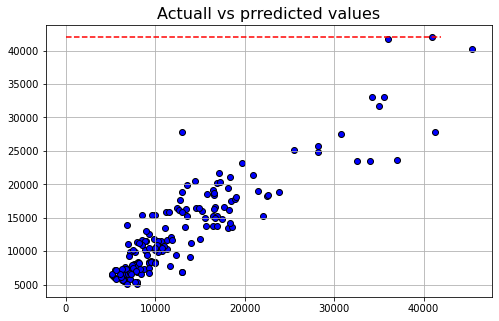

In [63]:
plt.figure(figsize=(8,5))
plt.title("Actuall vs prredicted values",fontsize=16)
plt.scatter(x=y_train,y=y_pred2,color='blue',edgecolor='k')
plt.grid(True)
plt.hlines(y =  max(y_pred2), xmin = 0 , xmax = max(y_pred2) , linestyle = '--' , color = 'red') # Only horizontal line

In [75]:
from sklearn.preprocessing import StandardScaler
#residuals = StandardScaler().fit_transform(np.array(residuals).flatten())
mu , std = np.mean(residuals) , np.std(residuals)
print(mu , std)

residuals = [ (i - mu)/std for i in residuals]
residuals

7.985807137518394e-13 3428.181688684336


[        price
 192  1.394166
 1    0.338724
 5   -0.238757
 16   3.912633
 49  -1.670731
 ..        ...
 190  0.505614
 71   0.312420
 185  0.001472
 21  -0.461589
 194 -0.867857
 
 [164 rows x 1 columns]]

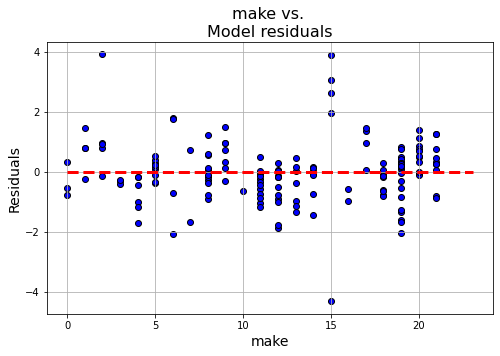

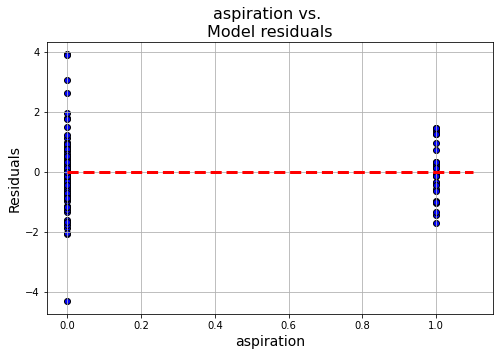

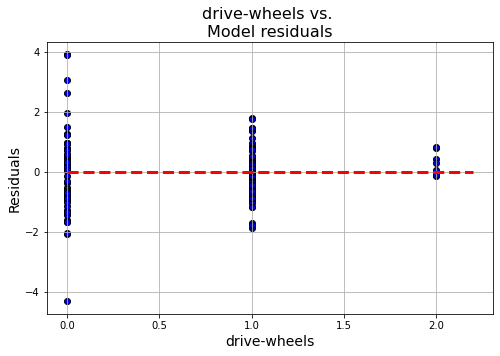

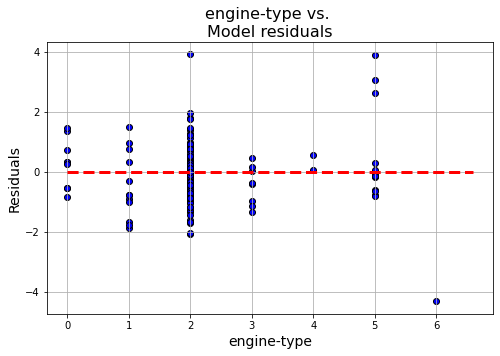

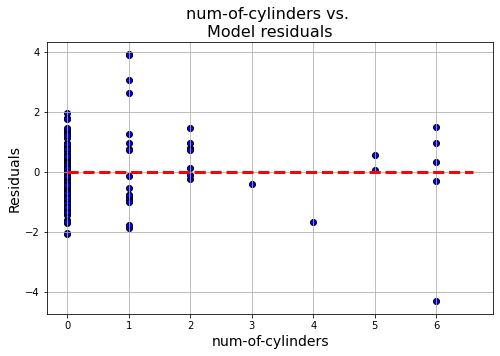

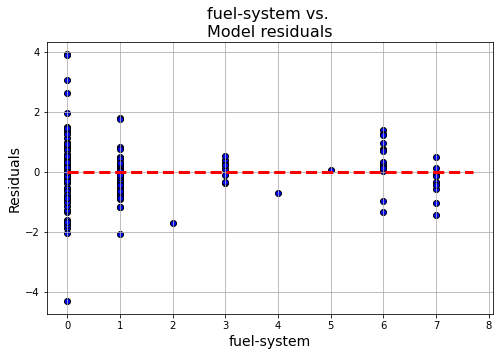

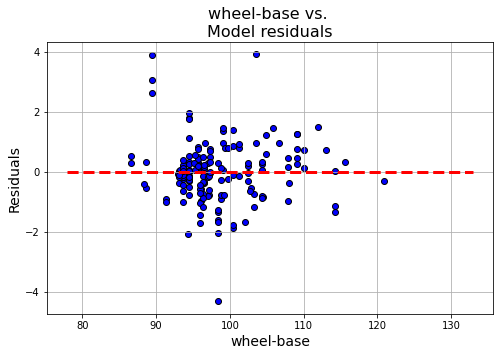

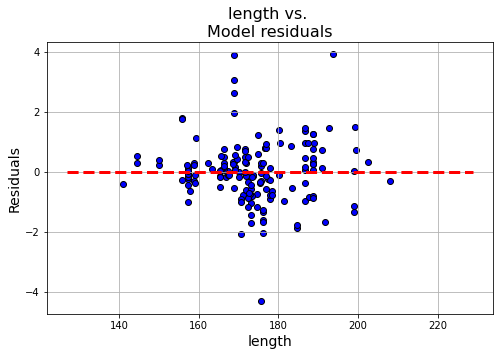

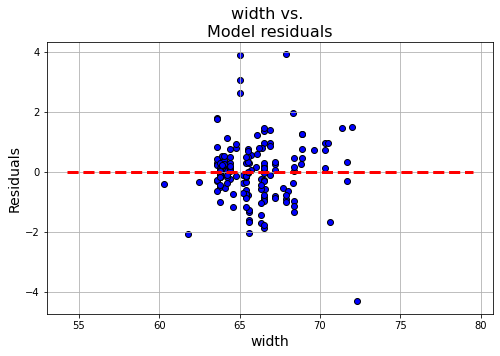

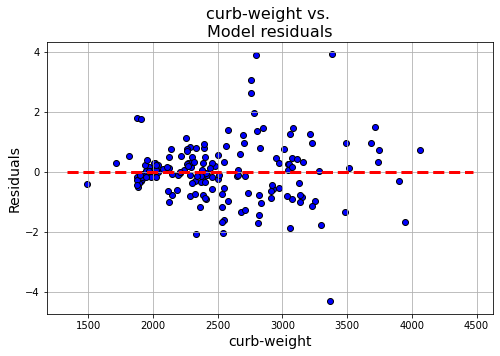

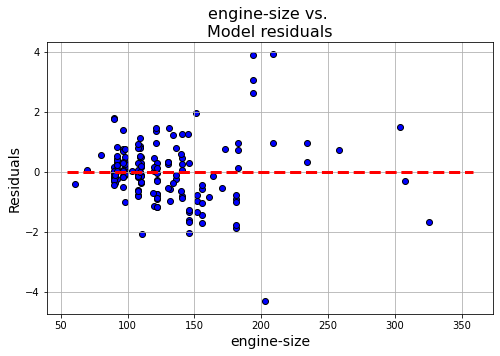

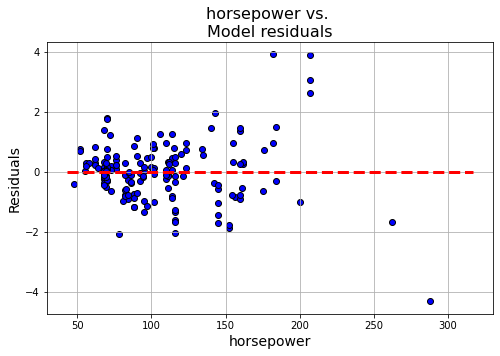

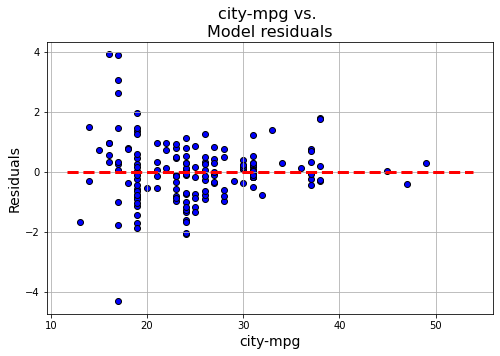

In [77]:
import matplotlib.pyplot as plt
for c in df2.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=X_train[c],y=residuals,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(X_train[c])
    xmax = max(X_train[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

# Fitted vs residual

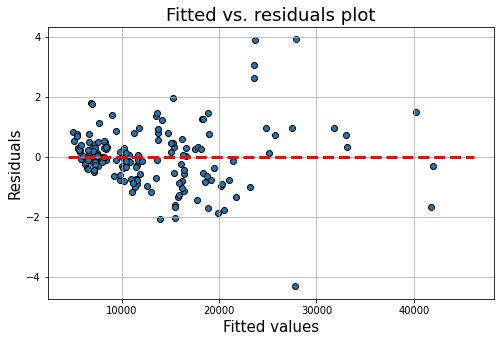

In [76]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=y_pred2,y=residuals,edgecolor='k')
xmin=min(y_pred2)
xmax = max(y_pred2)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()


In [95]:
from sklearn.preprocessing import minmax_scale
residuals_norm = minmax_scale(np.array(residuals).flatten())
residuals_norm

array([0.54341035, 0.36087466, 0.24473262, 0.41335196, 1.        ,
       0.18724855, 0.64228071, 0.44226875, 0.34772022, 0.0021625 ,
       0.06559453, 0.19152912, 0.25554658, 0.20650968, 0.34742507,
       0.2797289 , 0.6523201 , 0.        , 0.43363874, 0.27055127,
       0.39456364, 0.52256569, 0.26038096, 0.08038491, 0.03181545,
       0.39557566, 0.19597966, 0.27108022, 0.58252445, 0.39519626,
       0.29760727, 0.35972   , 0.32516425, 0.20075169, 0.25874797,
       0.43224752, 0.04432423, 0.08275593, 0.45082938, 0.64375007,
       0.36230842, 0.37287234, 0.49139945, 0.29643928, 0.19813403,
       0.14658075, 0.29277438, 0.47553169, 0.38450641, 0.32504779,
       0.32268299, 0.26398873, 0.20092017, 0.44207358, 0.39128994,
       0.18390029, 0.41064112, 0.16315555, 0.24399982, 0.10625839,
       0.60257973, 0.33138108, 0.41392823, 0.19068945, 0.41929231,
       0.37097736, 0.34067027, 0.32208694, 0.44682947, 0.33511545,
       0.41089709, 0.26200776, 0.46557207, 0.27369136, 0.13205

In [94]:
np.array(residuals).flatten()

array([ 3419.43229329,    81.09520704, -2042.98966509,  1040.83583992,
       11769.85518294, -3094.29739864,  5227.64098099,  1569.68577893,
        -159.48207469, -6479.27734962, -5319.18911658, -3016.01153052,
       -1845.21644474, -2742.03675825,  -164.88010239, -1402.95370992,
        5411.24815991, -6518.8266163 ,  1411.85425935, -1570.80058307,
         697.22218127,  3038.21105043, -1756.80206593, -5048.69251027,
       -5936.96403661,   715.73074856, -2934.61700031, -1561.12665584,
        4134.77769238,   708.79198122, -1075.98195923,    59.97793562,
        -572.00107452, -2847.34292135, -1786.6672412 ,  1386.41070004,
       -5708.19487579, -5005.32974054,  1726.24845125,  5254.51362105,
         107.31678007,   300.516896  ,  2468.22161441, -1097.34292135,
       -2895.21644474, -3838.05785417, -1164.36908831,  2178.02109408,
         513.28877121,  -574.13110332,  -617.3800508 , -1690.82066111,
       -2844.26163979,  1566.11636143,   637.35062765, -3155.53267297,
      

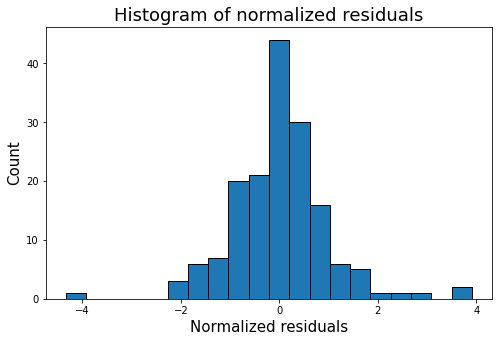

In [79]:
plt.figure(figsize=(8,5))
plt.hist(np.array(residuals).flatten(),bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

<Figure size 576x360 with 0 Axes>

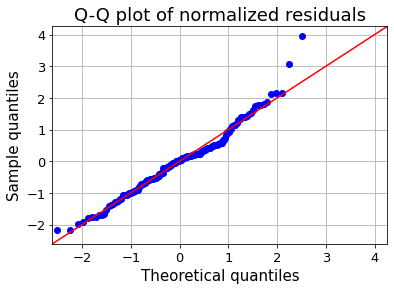

In [97]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(residuals_norm,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

### Let us normalize all columns and then check the accuracy , Acurracy is very much graet just by nrmalizing the columns

In [80]:
#Feature Scaling
from sklearn.preprocessing import Normalizer

cement_n = Normalizer().fit_transform(df2)
cement_n = pd.DataFrame(cement_n)
print(cement_n)

           0         1         2         3         4         5         6   \
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.006450   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.005306   
2    0.000000  0.000000  0.000000  0.000060  0.000060  0.000000  0.005644   
3    0.000071  0.000000  0.000071  0.000141  0.000000  0.000000  0.007055   
4    0.000057  0.000000  0.000113  0.000113  0.000113  0.000000  0.005622   
..        ...       ...       ...       ...       ...       ...       ...   
200  0.001228  0.000000  0.000000  0.000117  0.000000  0.000000  0.006379   
201  0.001089  0.000052  0.000000  0.000104  0.000000  0.000000  0.005656   
202  0.000968  0.000000  0.000000  0.000046  0.000046  0.000000  0.005028   
203  0.000925  0.000044  0.000000  0.000088  0.000044  0.000264  0.004806   
204  0.000920  0.000044  0.000000  0.000088  0.000000  0.000000  0.004778   

           7         8         9         10        11        12        13  

In [81]:
X = cement_n.iloc[:,:13]
print(X.head())
y = cement_n.iloc[:,13:]
print(y.head())

         0    1         2         3         4    5         6         7   \
0  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.006450  0.012289   
1  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.005306  0.010109   
2  0.000000  0.0  0.000000  0.000060  0.000060  0.0  0.005644  0.010226   
3  0.000071  0.0  0.000071  0.000141  0.000000  0.0  0.007055  0.012483   
4  0.000057  0.0  0.000113  0.000113  0.000113  0.0  0.005622  0.009989   

         8         9         10        11        12  
0  0.004667  0.185498  0.009464  0.008081  0.001529  
1  0.003839  0.152596  0.007786  0.006648  0.001258  
2  0.003912  0.168613  0.009079  0.009198  0.001135  
3  0.004679  0.165196  0.007705  0.007210  0.001696  
4  0.003756  0.159736  0.007693  0.006505  0.001018  
         13
0  0.982456
1  0.988161
2  0.985520
3  0.986087
4  0.987034


In [82]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [83]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(164, 13)
(164, 1)
(41, 13)
(41, 1)


In [84]:
#Training
regr.fit(X_train, y_train) #Past-input and Past-Output ( for learning of algorithm basically) , fitting values

LinearRegression()

In [85]:
# The coefficients
print('Coefficients', regr.coef_)
print('Intercept',regr.intercept_)

Coefficients [[ 0.04108598 -2.97689767  6.11796562 -7.10955638 -5.77256849  1.11130194
  -2.27292008  0.6490254   1.46102777 -0.15995455 -0.67852465  0.10402194
  -0.9260185 ]]
Intercept [1.01939849]


In [94]:
y_pred = regr.predict(X_test) #Transforming/predicting values based on "Testing/new Input Data"
y_pred2 = regr.predict(X_train)

In [95]:
y_pred#.sort() # predicted values 

array([[0.97553808],
       [0.99318596],
       [0.99116965],
       [0.98209419],
       [0.9618124 ],
       [1.00288432],
       [0.9623558 ],
       [0.95545329],
       [0.9557436 ],
       [0.96755615],
       [0.97963185],
       [0.99378333],
       [0.99704964],
       [0.9845586 ],
       [0.97396012],
       [0.96418685],
       [0.97037875],
       [0.94343158],
       [0.96533817],
       [0.9657717 ],
       [0.98390257],
       [0.98255763],
       [0.99366707],
       [0.99214384],
       [0.95495086],
       [0.94602199],
       [0.98026687],
       [0.9685818 ],
       [0.9503485 ],
       [0.96946334],
       [0.9848552 ],
       [0.98492769],
       [0.96326123],
       [0.9783715 ],
       [0.95807381],
       [0.95930737],
       [0.96392332],
       [0.97800389],
       [0.96052208],
       [0.97924227],
       [0.95261559]])

In [88]:
### Test accuracy is 96%
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
#There always be a +ve relation B/W Actual and predicted values (as actual are increasing the predicted are also increasing )

0.9482338199053191


In [89]:
### Train accuracy is 97%
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_train, y_pred2)) #Coefficient of Determination

0.9798502990273154


In [93]:
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))

MAE test score: 0.00233570506057158
RMSE test score: 0.003574943723018157


In [96]:
residuals = [y_train - y_pred2]
residuals

[           13
 124  0.000935
 201  0.000327
 63   0.002042
 58   0.000938
 79  -0.001505
 ..        ...
 98   0.002792
 198 -0.000423
 193  0.000485
 190  0.001717
 153 -0.005650
 
 [164 rows x 1 columns]]

# Residuals as per each variable

In [62]:
import matplotlib.pyplot as plt

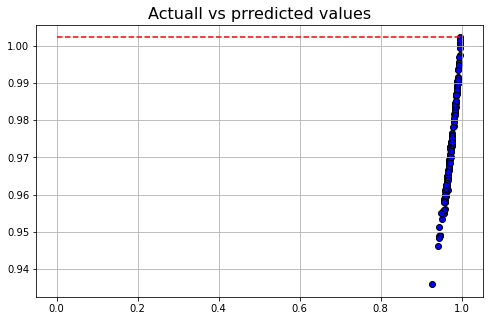

In [97]:
plt.figure(figsize=(8,5))
plt.title("Actuall vs prredicted values",fontsize=16)
plt.scatter(x=y_train,y=y_pred2,color='blue',edgecolor='k')
plt.grid(True)
plt.hlines(y =  max(y_pred2), xmin = 0 , xmax = max(y_pred2) , linestyle = '--' , color = 'red') # Only horizontal line

In [98]:
"""from sklearn.preprocessing import StandardScaler
#residuals = StandardScaler().fit_transform(np.array(residuals).flatten())
mu , std = np.mean(residuals) , np.std(residuals)
print(mu , std)

residuals = [ (i - mu)/std for i in residuals]
residuals"""

'from sklearn.preprocessing import StandardScaler\n#residuals = StandardScaler().fit_transform(np.array(residuals).flatten())\nmu , std = np.mean(residuals) , np.std(residuals)\nprint(mu , std)\n\nresiduals = [ (i - mu)/std for i in residuals]\nresiduals'

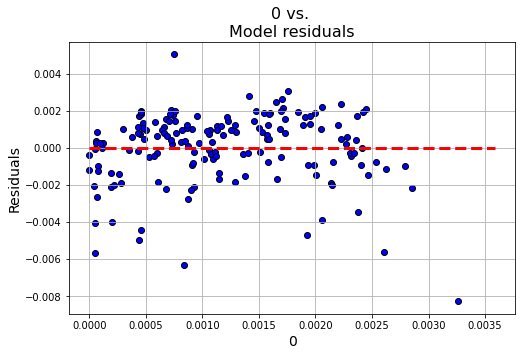

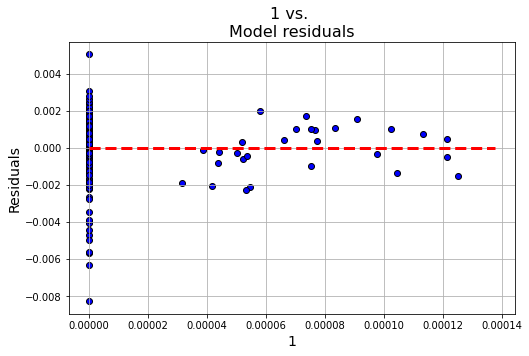

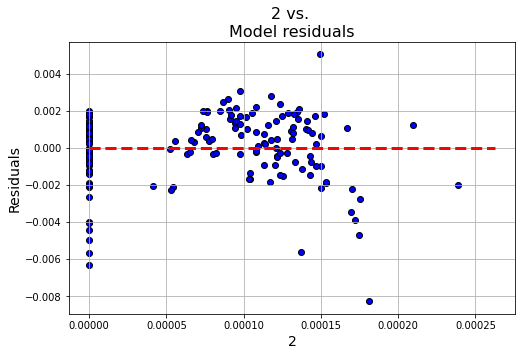

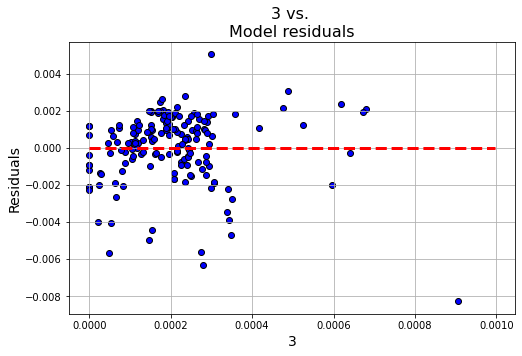

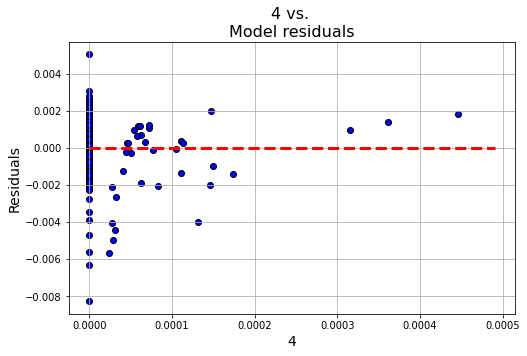

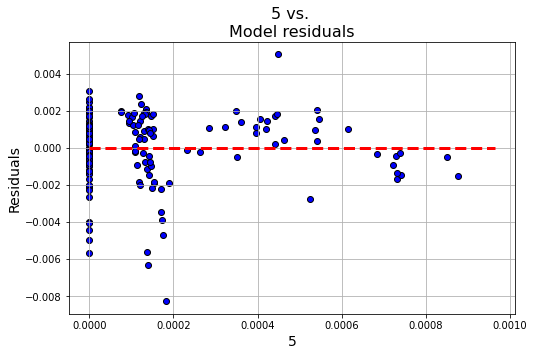

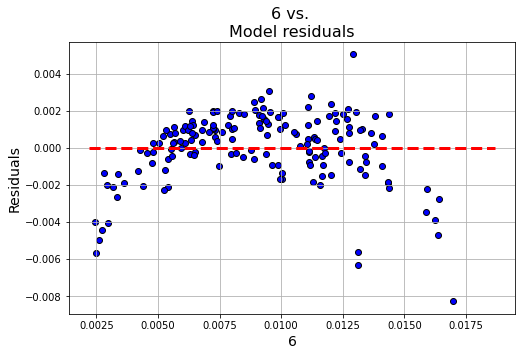

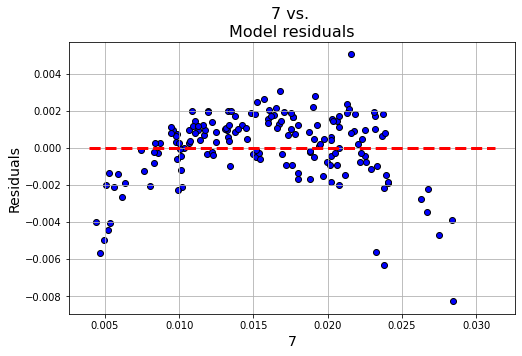

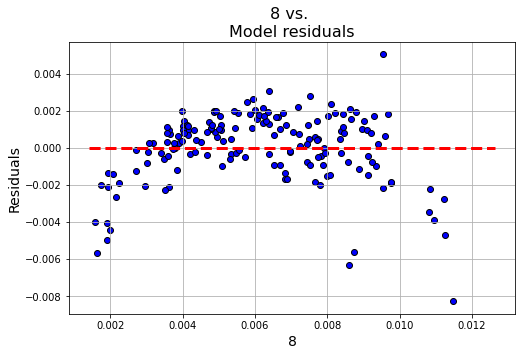

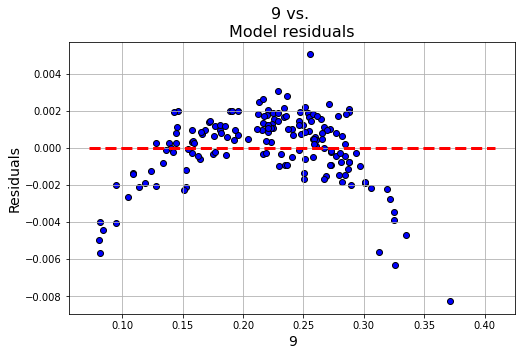

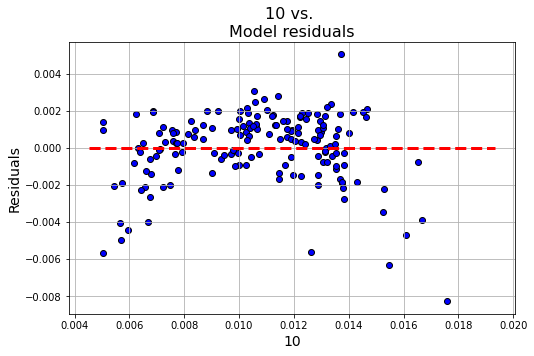

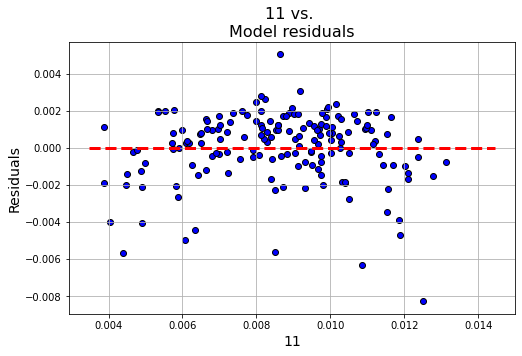

In [100]:
import matplotlib.pyplot as plt
for c in X_train.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=X_train[c],y=residuals,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(X_train[c])
    xmax = max(X_train[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

# Fitted vs residual

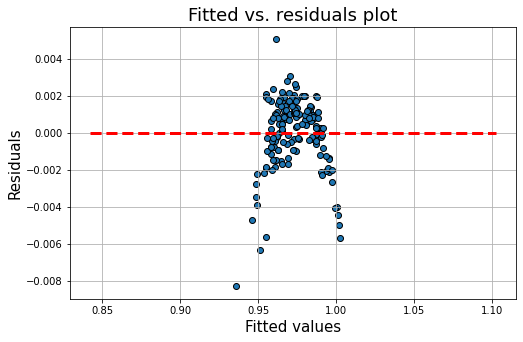

In [101]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=y_pred2,y=residuals,edgecolor='k')
xmin=min(y_pred2)
xmax = max(y_pred2)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()


In [95]:
from sklearn.preprocessing import minmax_scale
residuals_norm = minmax_scale(np.array(residuals).flatten())
residuals_norm

array([0.54341035, 0.36087466, 0.24473262, 0.41335196, 1.        ,
       0.18724855, 0.64228071, 0.44226875, 0.34772022, 0.0021625 ,
       0.06559453, 0.19152912, 0.25554658, 0.20650968, 0.34742507,
       0.2797289 , 0.6523201 , 0.        , 0.43363874, 0.27055127,
       0.39456364, 0.52256569, 0.26038096, 0.08038491, 0.03181545,
       0.39557566, 0.19597966, 0.27108022, 0.58252445, 0.39519626,
       0.29760727, 0.35972   , 0.32516425, 0.20075169, 0.25874797,
       0.43224752, 0.04432423, 0.08275593, 0.45082938, 0.64375007,
       0.36230842, 0.37287234, 0.49139945, 0.29643928, 0.19813403,
       0.14658075, 0.29277438, 0.47553169, 0.38450641, 0.32504779,
       0.32268299, 0.26398873, 0.20092017, 0.44207358, 0.39128994,
       0.18390029, 0.41064112, 0.16315555, 0.24399982, 0.10625839,
       0.60257973, 0.33138108, 0.41392823, 0.19068945, 0.41929231,
       0.37097736, 0.34067027, 0.32208694, 0.44682947, 0.33511545,
       0.41089709, 0.26200776, 0.46557207, 0.27369136, 0.13205

In [94]:
np.array(residuals).flatten()

array([ 3419.43229329,    81.09520704, -2042.98966509,  1040.83583992,
       11769.85518294, -3094.29739864,  5227.64098099,  1569.68577893,
        -159.48207469, -6479.27734962, -5319.18911658, -3016.01153052,
       -1845.21644474, -2742.03675825,  -164.88010239, -1402.95370992,
        5411.24815991, -6518.8266163 ,  1411.85425935, -1570.80058307,
         697.22218127,  3038.21105043, -1756.80206593, -5048.69251027,
       -5936.96403661,   715.73074856, -2934.61700031, -1561.12665584,
        4134.77769238,   708.79198122, -1075.98195923,    59.97793562,
        -572.00107452, -2847.34292135, -1786.6672412 ,  1386.41070004,
       -5708.19487579, -5005.32974054,  1726.24845125,  5254.51362105,
         107.31678007,   300.516896  ,  2468.22161441, -1097.34292135,
       -2895.21644474, -3838.05785417, -1164.36908831,  2178.02109408,
         513.28877121,  -574.13110332,  -617.3800508 , -1690.82066111,
       -2844.26163979,  1566.11636143,   637.35062765, -3155.53267297,
      

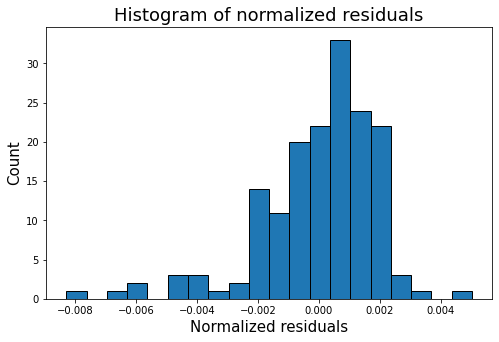

In [102]:
plt.figure(figsize=(8,5))
plt.hist(np.array(residuals).flatten(),bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

<Figure size 576x360 with 0 Axes>

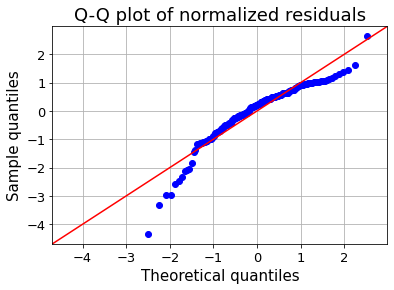

In [106]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(np.array(residuals).flatten(),line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

In [ ]:
residuals = [y_train - y_pred2]
residuals

# Residuals as per each variable

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.title("Actuall vs prredicted values",fontsize=16)
plt.scatter(x=y_train,y=y_pred2,color='blue',edgecolor='k')
plt.grid(True)
plt.hlines(y =  max(y_pred2), xmin = 0 , xmax = max(y_pred2) , linestyle = '--' , color = 'red') # Only horizontal line

from sklearn.preprocessing import StandardScaler
#residuals = StandardScaler().fit_transform(np.array(residuals).flatten())
mu , std = np.mean(residuals) , np.std(residuals)
print(mu , std)

residuals = [ (i - mu)/std for i in residuals]
residuals

import matplotlib.pyplot as plt
for c in df2.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=X_train[c],y=residuals,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(X_train[c])
    xmax = max(X_train[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

# Fitted vs residual



plt.figure(figsize=(8,5))
p=plt.scatter(x=y_pred2,y=residuals,edgecolor='k')
xmin=min(y_pred2)
xmax = max(y_pred2)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()


from sklearn.preprocessing import minmax_scale
residuals_norm = minmax_scale(np.array(residuals).flatten())
residuals_norm

np.array(residuals).flatten()

plt.figure(figsize=(8,5))
plt.hist(np.array(residuals).flatten(),bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(residuals_norm,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

### let us normalize some columns and then check accuracy , even good test-accuracy = 97% , train-accuracy = 97%

In [82]:
print(df2.shape)
df2.head(3)

(205, 14)


,make,aspiration,drive-wheels,engine-type,num-of-cylinders,fuel-system,wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg,price
0,0,0,0,0,0,0,88.6,168.8,64.1,2548,130,111,21,13495.0
1,0,0,0,0,0,0,88.6,168.8,64.1,2548,130,111,21,16500.0
2,0,0,0,1,1,0,94.5,171.2,65.5,2823,152,154,19,16500.0


In [78]:
#Feature Scaling
from sklearn.preprocessing import Normalizer

cement_n = Normalizer().fit_transform(df2.iloc[:,6:])
cement_n = pd.DataFrame(cement_n)
print(cement_n)

            0         1         2         3         4         5         6  \
0    0.006450  0.012289  0.004667  0.185498  0.009464  0.008081  0.001529   
1    0.005306  0.010109  0.003839  0.152596  0.007786  0.006648  0.001258   
2    0.005644  0.010226  0.003912  0.168613  0.009079  0.009198  0.001135   
3    0.007055  0.012483  0.004679  0.165196  0.007705  0.007210  0.001696   
4    0.005622  0.009989  0.003756  0.159736  0.007693  0.006505  0.001018   
..        ...       ...       ...       ...       ...       ...       ...   
200  0.006379  0.011038  0.004028  0.172589  0.008244  0.006665  0.001345   
201  0.005656  0.009787  0.003567  0.158061  0.007309  0.008294  0.000985   
202  0.005028  0.008701  0.003175  0.138818  0.007973  0.006176  0.000830   
203  0.004806  0.008317  0.003035  0.141712  0.006387  0.004669  0.001145   
204  0.004778  0.008269  0.003018  0.134103  0.006175  0.004993  0.000832   

            7  
0    0.982456  
1    0.988161  
2    0.985520  
3    0.9860

In [83]:
df22 = pd.concat([df2,cement_n], axis=1)
df22

,make,aspiration,drive-wheels,engine-type,num-of-cylinders,fuel-system,wheel-base,length,width,curb-weight,...,city-mpg,price,0,1,2,3,4,5,6,7
0,0,0,0,0,0,0,88.6,168.8,64.1,2548,...,21,13495.0,0.006450,0.012289,0.004667,0.185498,0.009464,0.008081,0.001529,0.982456
1,0,0,0,0,0,0,88.6,168.8,64.1,2548,...,21,16500.0,0.005306,0.010109,0.003839,0.152596,0.007786,0.006648,0.001258,0.988161
2,0,0,0,1,1,0,94.5,171.2,65.5,2823,...,19,16500.0,0.005644,0.010226,0.003912,0.168613,0.009079,0.009198,0.001135,0.985520
3,1,0,1,2,0,0,99.8,176.6,66.2,2337,...,24,13950.0,0.007055,0.012483,0.004679,0.165196,0.007705,0.007210,0.001696,0.986087
4,1,0,2,2,2,0,99.4,176.6,66.4,2824,...,18,17450.0,0.005622,0.009989,0.003756,0.159736,0.007693,0.006505,0.001018,0.987034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,0,0,2,0,0,109.1,188.8,68.9,2952,...,23,16845.0,0.006379,0.011038,0.004028,0.172589,0.008244,0.006665,0.001345,0.984845
201,21,1,0,2,0,0,109.1,188.8,68.8,3049,...,19,19045.0,0.005656,0.009787,0.003567,0.158061,0.007309,0.008294,0.000985,0.987296
202,21,0,0,1,1,0,109.1,188.8,68.9,3012,...,18,21485.0,0.005028,0.008701,0.003175,0.138818,0.007973,0.006176,0.000830,0.990210
203,21,1,0,2,1,6,109.1,188.8,68.9,3217,...,26,22470.0,0.004806,0.008317,0.003035,0.141712,0.006387,0.004669,0.001145,0.989824


In [84]:
df22.drop(columns={'wheel-base','length','width','curb-weight','engine-size','horsepower','city-mpg','price'}, inplace=True)
df22.head(3)

,make,aspiration,drive-wheels,engine-type,num-of-cylinders,fuel-system,0,1,2,3,4,5,6,7
0,0,0,0,0,0,0,0.006450,0.012289,0.004667,0.185498,0.009464,0.008081,0.001529,0.982456
1,0,0,0,0,0,0,0.005306,0.010109,0.003839,0.152596,0.007786,0.006648,0.001258,0.988161
2,0,0,0,1,1,0,0.005644,0.010226,0.003912,0.168613,0.009079,0.009198,0.001135,0.985520


In [94]:
X = df22.iloc[:,:13]
print(X.head())
y = df22.iloc[:,13:]
print(y.head())

   make  aspiration  drive-wheels  engine-type  num-of-cylinders  fuel-system  \
0     0           0             0            0                 0            0   
1     0           0             0            0                 0            0   
2     0           0             0            1                 1            0   
3     1           0             1            2                 0            0   
4     1           0             2            2                 2            0   

          0         1         2         3         4         5         6  
0  0.006450  0.012289  0.004667  0.185498  0.009464  0.008081  0.001529  
1  0.005306  0.010109  0.003839  0.152596  0.007786  0.006648  0.001258  
2  0.005644  0.010226  0.003912  0.168613  0.009079  0.009198  0.001135  
3  0.007055  0.012483  0.004679  0.165196  0.007705  0.007210  0.001696  
4  0.005622  0.009989  0.003756  0.159736  0.007693  0.006505  0.001018  
          7
0  0.982456
1  0.988161
2  0.985520
3  0.986087
4  0.9870

In [86]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [87]:
regr.fit(X_train, y_train)

LinearRegression()

In [88]:
# The coefficients
print('Coefficients', regr.coef_)
print('Intercept',regr.intercept_)

Coefficients [[-2.87201205e-06 -7.22622516e-04  4.97236088e-04 -3.69727133e-04
  -4.96833796e-04  2.98442858e-04 -3.26847733e-01  1.42788239e+00
  -3.29823963e+00 -2.14461983e-01 -5.93007456e-01  6.63396400e-01
   2.04747868e-01]]
Intercept [1.02120385]


In [89]:
y_pred = regr.predict(X_test) #Transforming/predicting values based on "Testing/new Input Data"
y_pred2 = regr.predict(X_train)

In [93]:
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination

0.9768857334239314


In [91]:
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_train, y_pred2)) #Coefficient of Determination

0.9781634635893653


In [92]:
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))

MAE test score: 0.0016140644739856668
RMSE test score: 0.002134361601544214


In [95]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = regr, X = X_train,\
     y = y_train, cv = 10)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))
print("\n",accuracies)

Accuracy Mean 0.9697351767188526 Accuracy Variance      0.012203581095350743

 [0.9753897  0.96382071 0.98007955 0.97218068 0.94325426 0.96363415
 0.98038518 0.95636924 0.97798777 0.98425052]


### let us apply decision tree

In [96]:
from sklearn.tree import DecisionTreeRegressor #Non-Parametric Model
regrr = DecisionTreeRegressor()

In [97]:
print(X_train.head(2))
print(X_test.head(2))

     make  aspiration  drive-wheels  engine-type  num-of-cylinders  \
60      8           0             1            2                 0   
198    21           1             0            2                 0   

     fuel-system         0         1         2         3         4         5  \
60             1  0.011184  0.020127  0.007528  0.272806  0.013810  0.009509   
198            0  0.005586  0.010111  0.003599  0.163074  0.006962  0.008676   

            6  
60   0.002943  
198  0.000910  
     make  aspiration  drive-wheels  engine-type  num-of-cylinders  \
109    13           0             0            3                 0   
6       1           0             1            2                 2   

     fuel-system         0         1         2         3         4         5  \
109            0  0.008883  0.015472  0.005321  0.251251  0.009334  0.007545   
6              0  0.005898  0.010742  0.003980  0.158535  0.007581  0.006132   

            6  
109  0.001478  
6    0.001059  


In [98]:
regrr.fit(X_train, y_train)

DecisionTreeRegressor()

In [99]:
y_pred = regrr.predict(X_test) #Transforming/predicting values based on "Testing/new Input Data"
y_pred2 = regrr.predict(X_train)

In [100]:
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
print(r2_score(y_train, y_pred2)) #Coefficient of Determination

0.998638353200701
1.0


In [102]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = regrr, X = X_train,\
     y = y_train, cv = 10)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))
print("\n",accuracies)


Accuracy Mean 0.9922222576470278 Accuracy Variance      0.008873642019460623

 [0.99479117 0.99815768 0.99650014 0.99667488 0.98302522 0.99319129
 0.9979153  0.96874848 0.99651807 0.99670034]


In [103]:
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))

MAE test score: 0.000411953503450333
RMSE test score: 0.0005180362787556289
